<a href="https://colab.research.google.com/github/Sanjana-Kannoorkar/Logistic-Regression/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Display first few rows
print("Sample rows:")
print(df.head())

# Show basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Sample rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wors

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'diagnosis' is the target column, convert it to binary (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop any non-feature columns like 'id' or 'Unnamed: 32' if present
X = df.drop(columns=['diagnosis', 'id', 'Unnamed: 32'], errors='ignore')
y = df['diagnosis']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


ROC-AUC Score: 0.9974


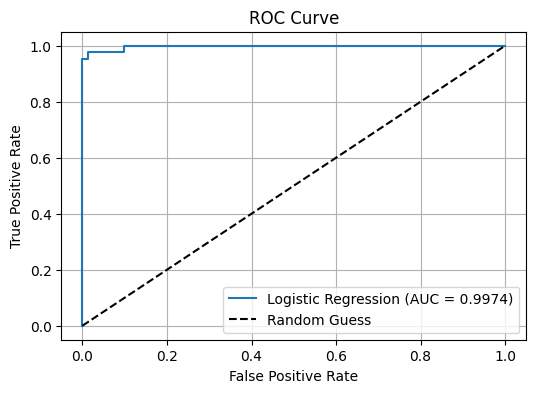

In [4]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# Predict probabilities and labels
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


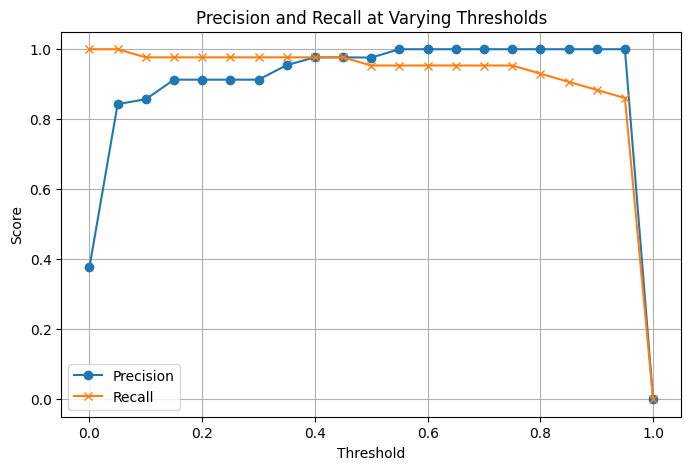

In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


# Predict probabilities for the positive class
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Generate a range of thresholds
thresholds = np.arange(0.0, 1.01, 0.05)
precision_scores = []
recall_scores = []

# Loop through thresholds and calculate scores
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_thresh, zero_division=0))

# Plot precision and recall
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='x')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Varying Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import f1_score

f1_scores = []

# Calculate F1 for each threshold
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    f1_scores.append(f1)

# Find the threshold with the best F1 score
best_index = np.argmax(f1_scores)
best_thresh = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Best Threshold: {best_thresh:.2f}")
print(f"Best F1 Score: {best_f1:.2f}")


Best Threshold: 0.40
Best F1 Score: 0.98
